## Loss & Accuracy Graphs

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Prepare list of epoch numbers
epoch = np.arange(1,21,1).tolist()
epoch_8 = np.arange(1,9,1).tolist()

In [3]:
# Details from the model training log
loss_512 = [0.2115, 0.0622, 0.0386, 0.0282,  0.0230, 0.0199, 0.0175, 0.0160, 0.0147, 0.0139,
        0.0132, 0.0126, 0.0122, 0.0119, 0.0115, 0.0112, 0.0108, 0.0106, 0.0104, 0.0102]
dc_512 = [0.8991, 0.9747, 0.9842, 0.9884, 0.9905, 0.9917, 0.9926, 0.9932 ,0.9937, 0.9941,
                    0.9944, 0.9946, 0.9948, 0.9949, 0.9950, 0.9952, 0.9953, 0.9954, 0.9955, 0.9955]
val_loss_512 = [0.0976, 0.0390, 0.0291, 0.0256, 0.0203, 0.0187, 0.0161, 0.0152, 0.0232, 0.0146,
            0.0142, 0.0148, 0.0133, 0.0127, 0.0119, 0.0119, 0.0115, 0.0116, 0.0116, 0.0113]
val_dc_512 = [0.9575, 0.9839, 0.9878, 0.9893, 0.9915, 0.9922, 0.9932, 0.9935, 0.9908, 0.9937,
                 0.9940, 0.9938, 0.9943, 0.9946, 0.9949, 0.9949, 0.9951, 0.9950, 0.9950, 0.9952]

In [4]:
# Details from the model training log
loss_1024 = [0.0981, 0.0279, 0.0174, 0.0129, 0.0117, 0.0103, 0.0098, 0.0091]
dc_1024 = [0.9560, 0.9893, 0.9930, 0.9946, 0.9952, 0.9957, 0.9959, 0.9961]
val_loss_1024 = [0.0321, 0.0183, 0.0139, 0.0122, 0.0117, 0.0092, 0.0091, 0.0095]
val_dc_1024 = [0.9871, 0.9926, 0.9943, 0.9951, 0.9953, 0.9961, 0.9961, 0.9961]

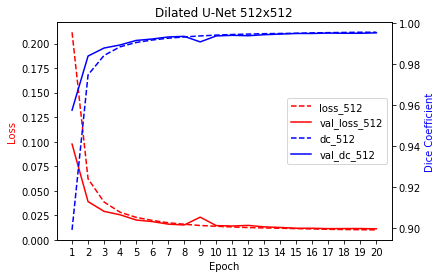

In [5]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(epoch, loss_512, 'r--', label='loss_512')
lns2 = ax1.plot(epoch, val_loss_512, 'r-', label='val_loss_512')
lns3 = ax2.plot(epoch, dc_512, 'b--', label='dc_512')
lns4 = ax2.plot(epoch, val_dc_512, 'b-', label='val_dc_512')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Dice Coefficient', color='b')

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='right')

plt.xticks(epoch)
plt.title('Dilated U-Net 512x512')
plt.show()

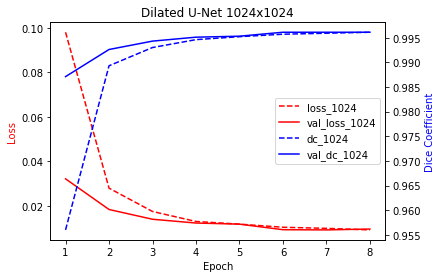

In [6]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
lns1 = ax1.plot(epoch[:8], loss_1024, 'r--', label='loss_1024')
lns2 = ax1.plot(epoch[:8], val_loss_1024, 'r-', label='val_loss_1024')
lns3 = ax2.plot(epoch[:8], dc_1024, 'b--', label='dc_1024')
lns4 = ax2.plot(epoch[:8], val_dc_1024, 'b-', label='val_dc_1024')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Dice Coefficient', color='b')

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='right')

plt.xticks(epoch[:8])
plt.title('Dilated U-Net 1024x1024')
plt.show()

## 1024x1024

In [7]:
%matplotlib inline
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
df_1024 = pd.read_csv("Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\1024.csv")
df_1024.head(2)

img                                           rle_mask
0  0ce66b539f52_01.jpg  762396 11 764261 92 766161 141 768064 169 7699...
1  0ce66b539f52_02.jpg  764330 17 766205 109 768100 166 770010 183 771...

In [9]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    From left to right then top to bot
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [10]:
pred_mask = []
for i in range(len(df_1024)):
    mask = rle_decode(df_1024['rle_mask'][i], (1280, 1918))
    mask[mask >= 1] = 255
    pred_mask.append(mask)

In [11]:
import glob
f_n_Lst = []
for filename in glob.glob('Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\single_car_model_Mask\\*.gif'):
    f_n_Lst.append(filename)

train_mask_Lst = []
for i in (f_n_Lst):
    train_mask = plt.imread(i)
    train_mask_Lst.append(train_mask)

In [12]:
f_n_Lst = []
for filename in glob.glob('Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\single_car_model_Train\\*.jpg'):
    f_n_Lst.append(filename)

ori_img_Lst = []
for i in (f_n_Lst):
    ori_img = plt.imread(i)
    ori_img_Lst.append(ori_img)

## 512x512

In [13]:
df_512 = pd.read_csv("Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\512.csv")
df_512.head(2)

img                                           rle_mask
0  0ce66b539f52_01.jpg  764255 113 766169 124 768060 180 769967 197 77...
1  0ce66b539f52_02.jpg  764313 72 766222 91 768095 175 770007 186 7719...

In [14]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    From left to right then top to bot
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [15]:
pred_mask_512 = []
for i in range(len(df_512)):
    mask = rle_decode(df_512['rle_mask'][i], (1280, 1918))
    mask[mask >= 1] = 255
    pred_mask_512.append(mask)

In [16]:
import glob
f_n_Lst = []
for filename in glob.glob('Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\single_car_model_Mask\\*.gif'):
    f_n_Lst.append(filename)

train_mask_Lst = []
for i in (f_n_Lst):
    train_mask = plt.imread(i)
    train_mask_Lst.append(train_mask)

In [17]:
f_n_Lst = []
for filename in glob.glob('Kaggle\\Carvana\\Tests_Small_Dataset\\Validating Results\\single_car_model_Train\\*.jpg'):
    f_n_Lst.append(filename)

ori_img_Lst = []
for i in (f_n_Lst):
    ori_img = plt.imread(i)
    ori_img_Lst.append(ori_img)

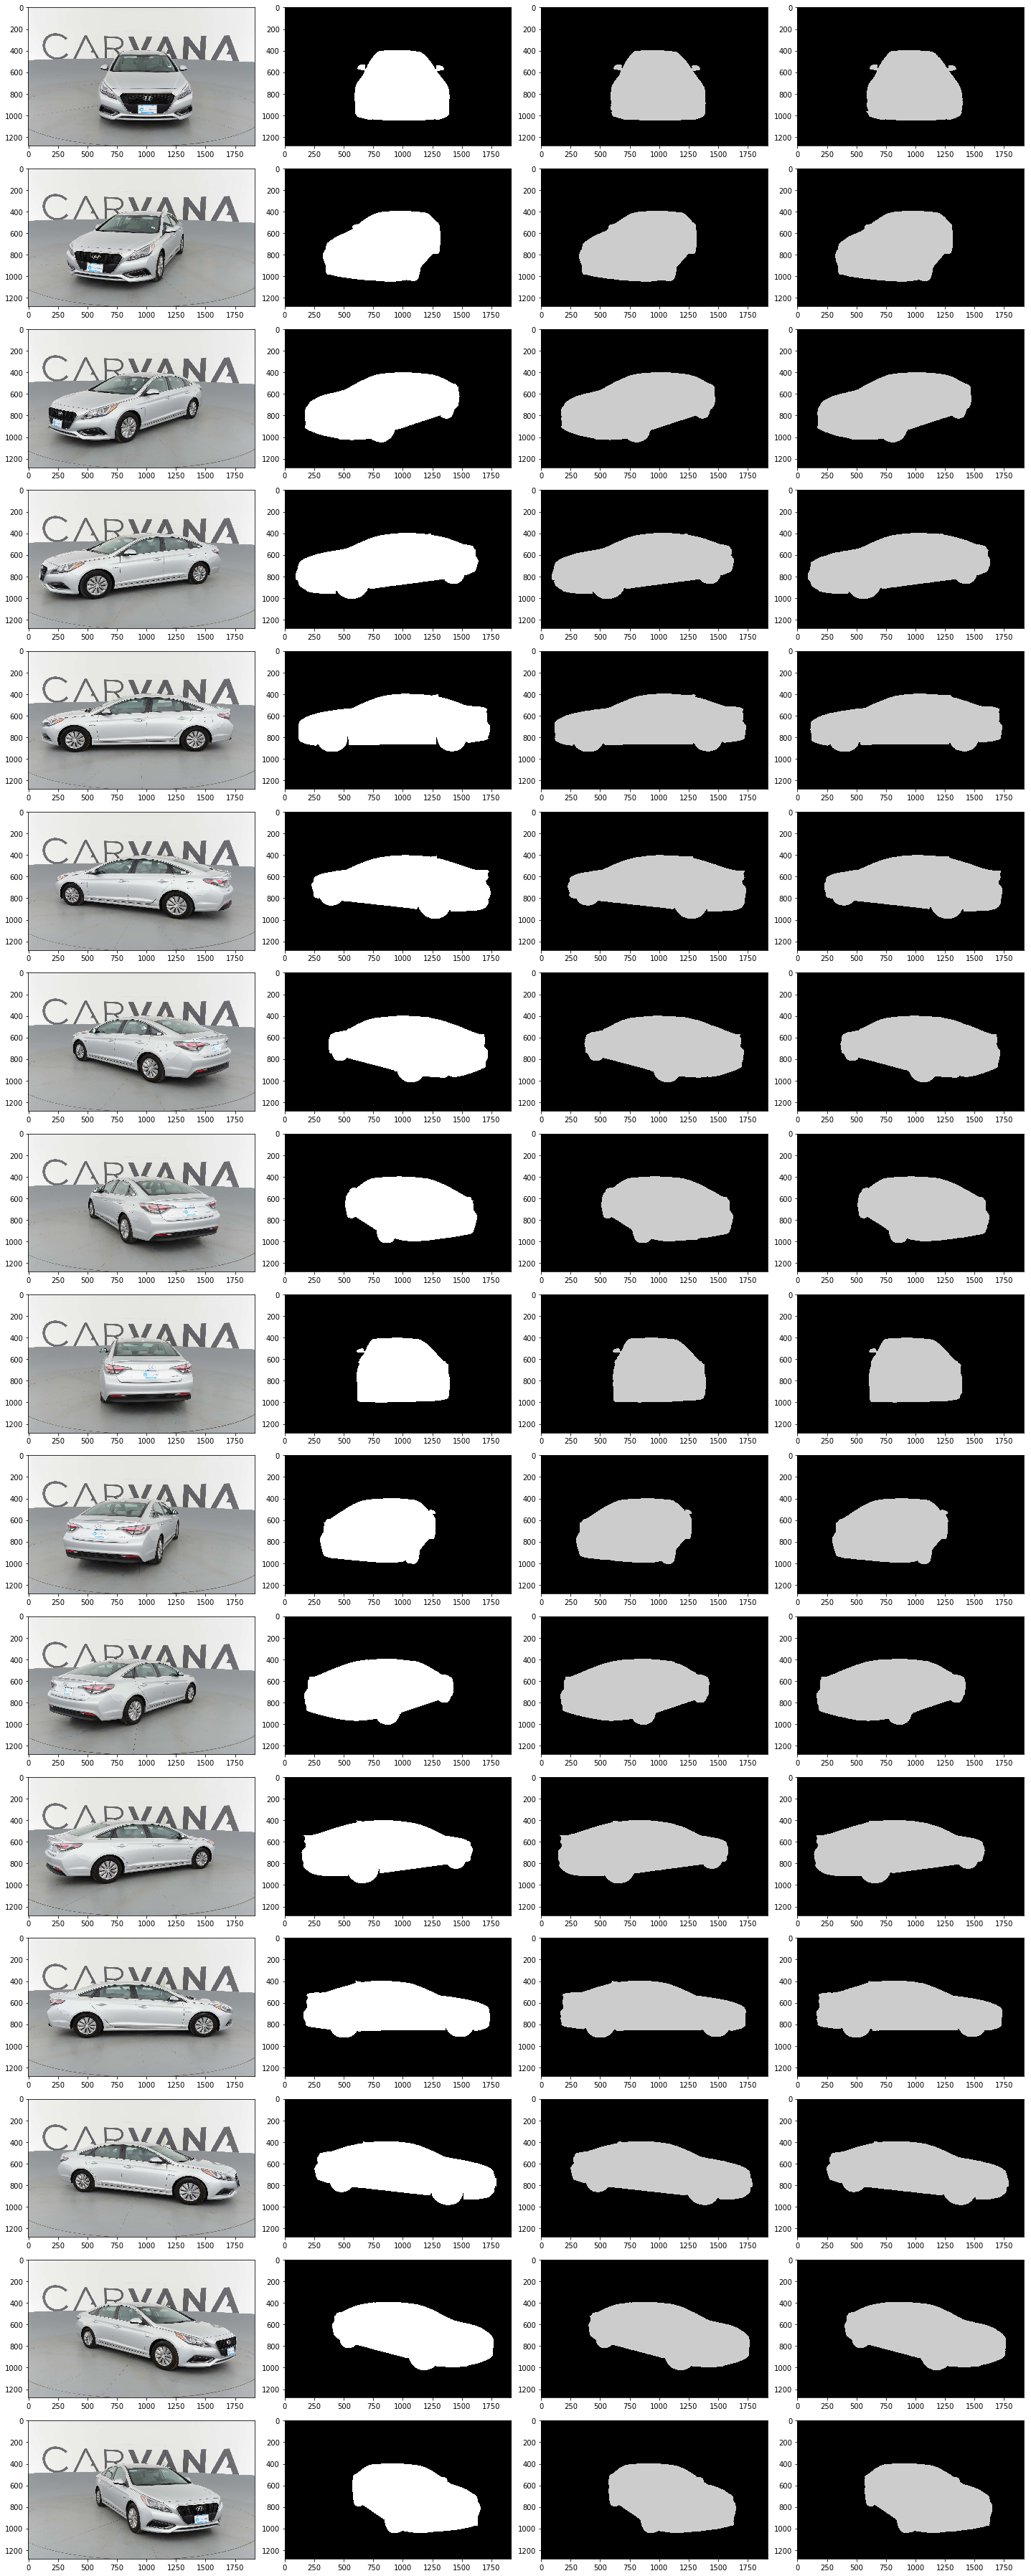

In [18]:
fig, m_axs  = plt.subplots(16,4, figsize=(20,50))

fig.tight_layout()
m_axs = m_axs.flatten()
for i in range(len(ori_img_Lst)*4):
    if (i%4 == 0):
        m_axs[i].imshow(ori_img_Lst[i//4],aspect="auto")
    elif (i%4==1):
        m_axs[i].imshow(train_mask_Lst[i//4], cmap='bone',aspect="auto")
    elif(i%4==2):
        m_axs[i].imshow(pred_mask[i//4], cmap='nipy_spectral',aspect="auto")
    else:
        m_axs[i].imshow(pred_mask_512[i//4], cmap='nipy_spectral',aspect="auto")

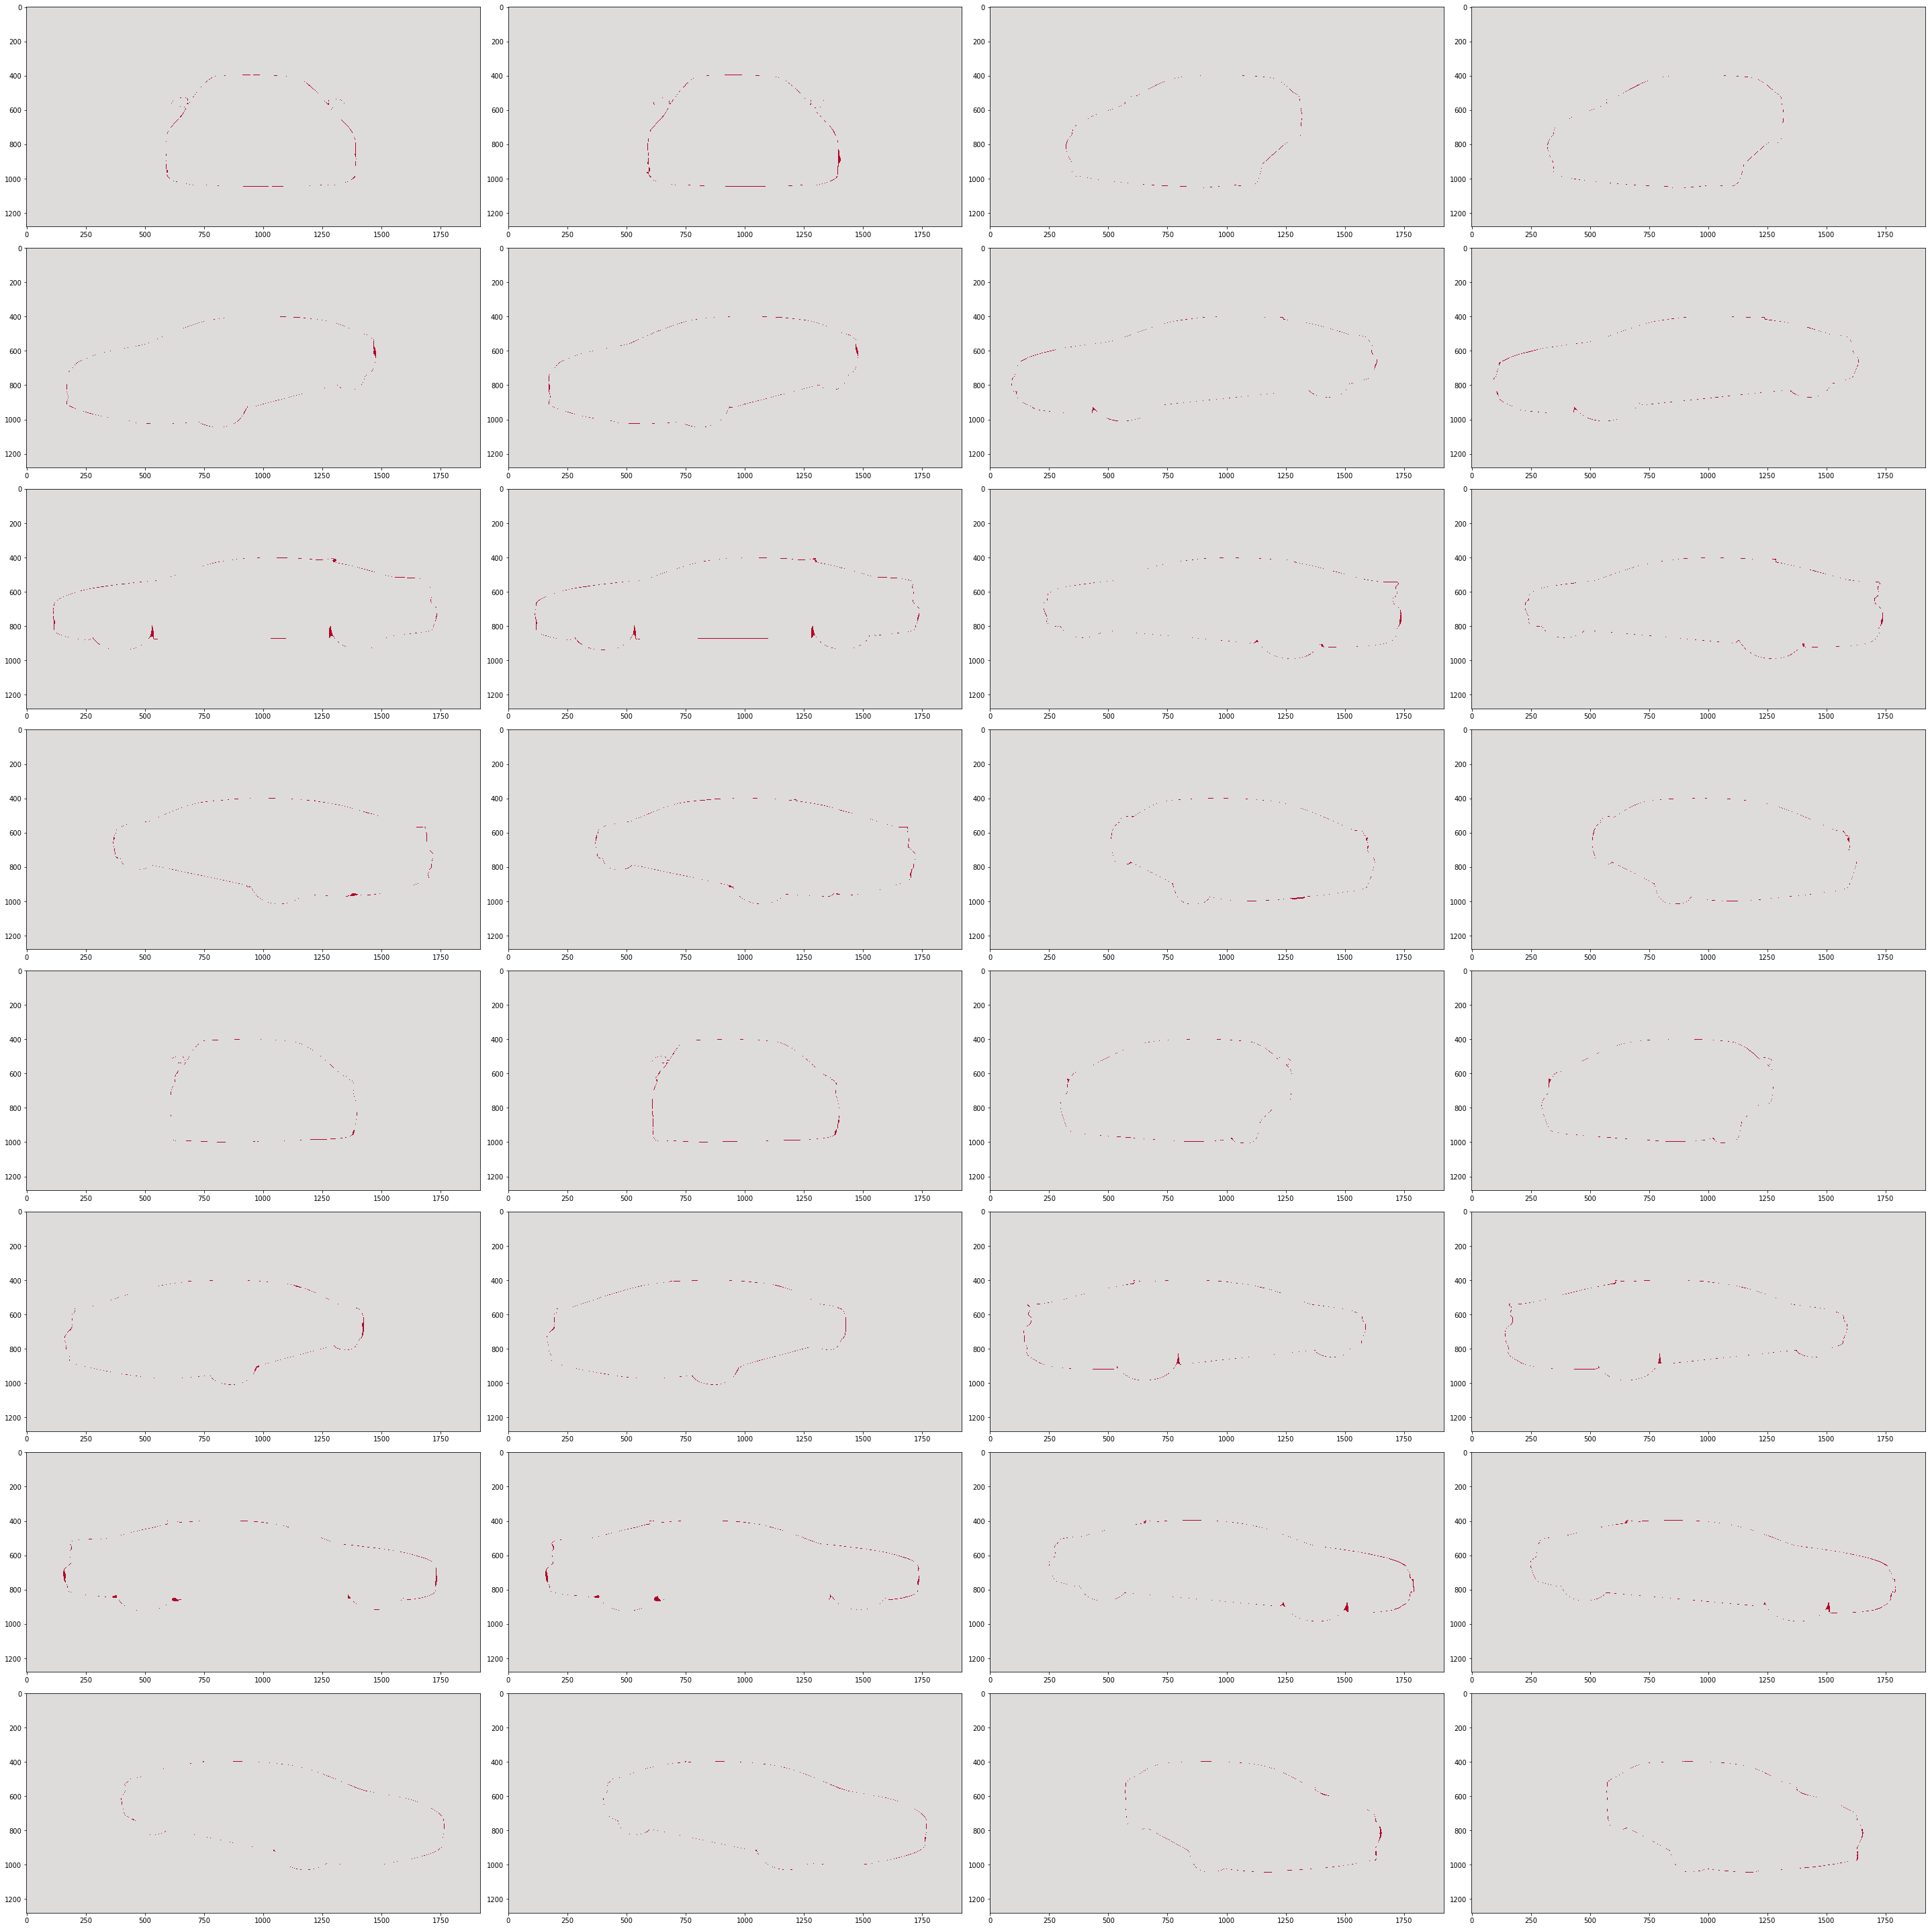

In [19]:
fig, m_axs  = plt.subplots(8,4, figsize=(40,40))

fig.tight_layout()
m_axs = m_axs.flatten()
for i in range(len(pred_mask_512)*2):
    if(i%2==0):
        m_axs[i].imshow(pred_mask[i//2]-train_mask_Lst[i//2][:,:,0],cmap='coolwarm', vmin=-1, vmax=1,aspect="auto")
    else:
        m_axs[i].imshow(pred_mask_512[i//2]-train_mask_Lst[i//2][:,:,0],cmap='coolwarm', vmin=-1, vmax=1,aspect="auto")

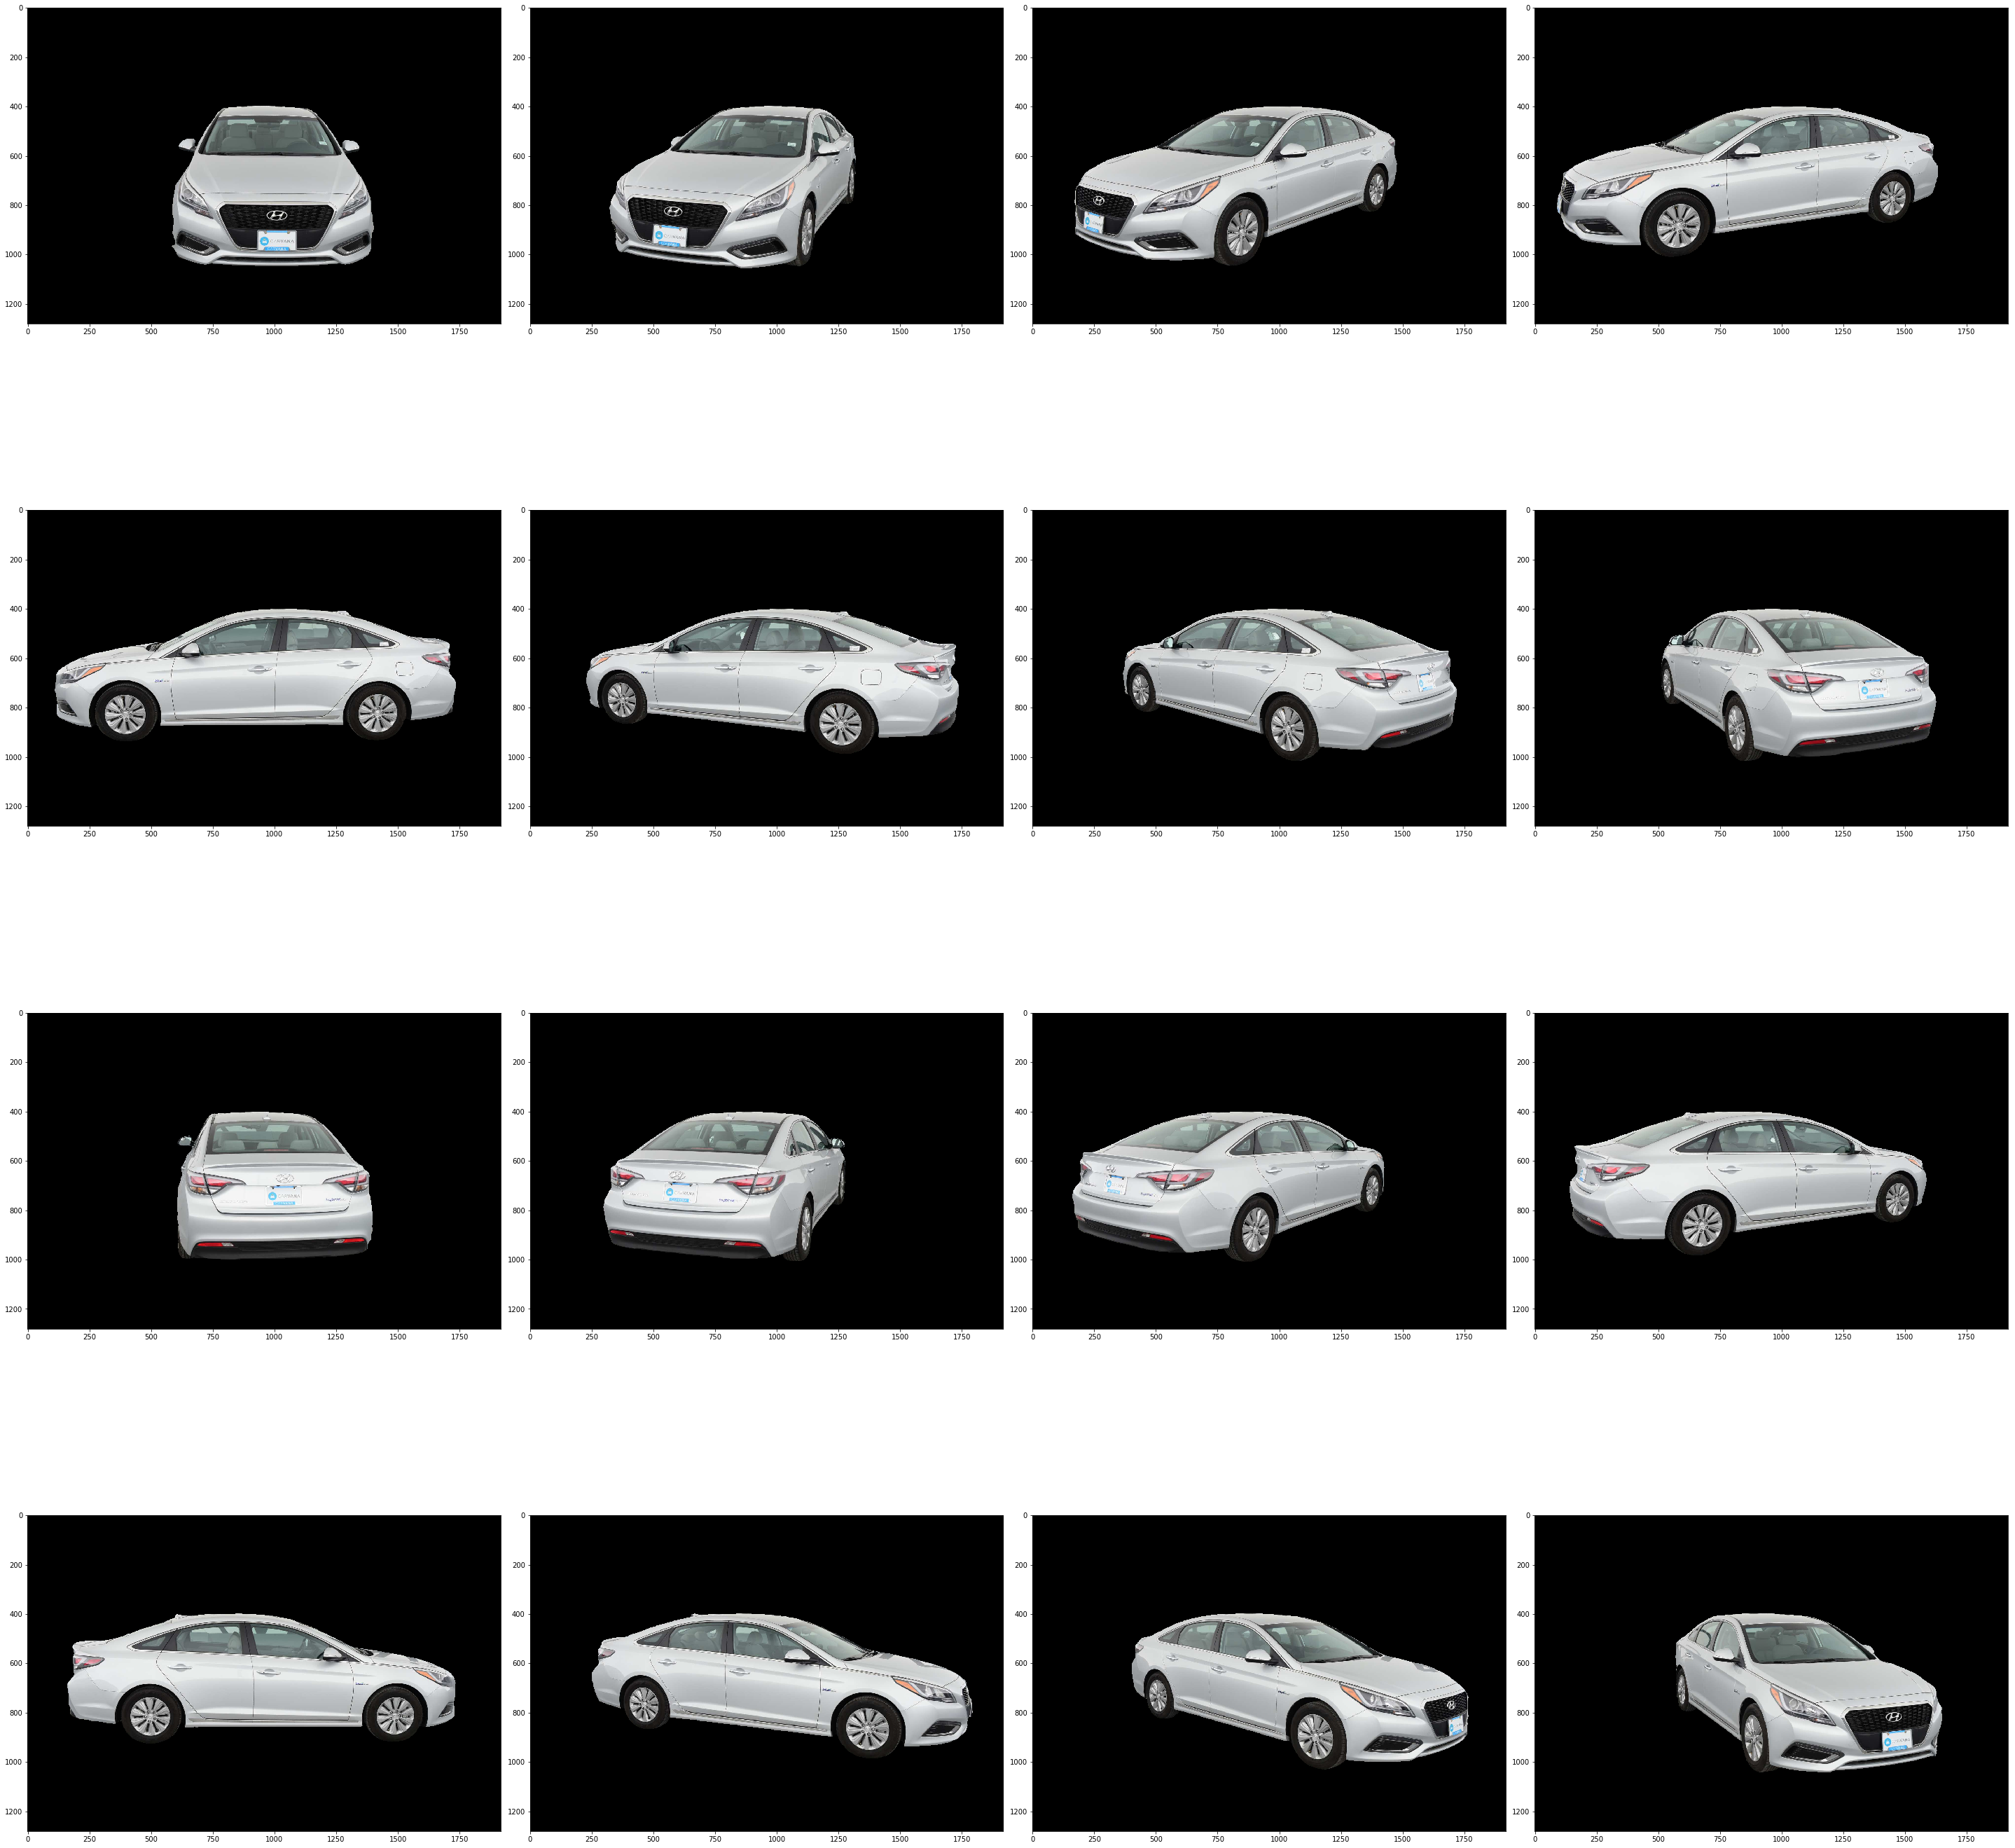

In [20]:
# 512
import cv2
fig, m_axs  = plt.subplots(4,4, figsize=(40,40))

fig.tight_layout()
m_axs = m_axs.flatten()
for i in range(len(pred_mask_512)):
    m_axs[i].imshow(cv2.bitwise_and(ori_img_Lst[i], ori_img_Lst[i], mask=pred_mask_512[i]))

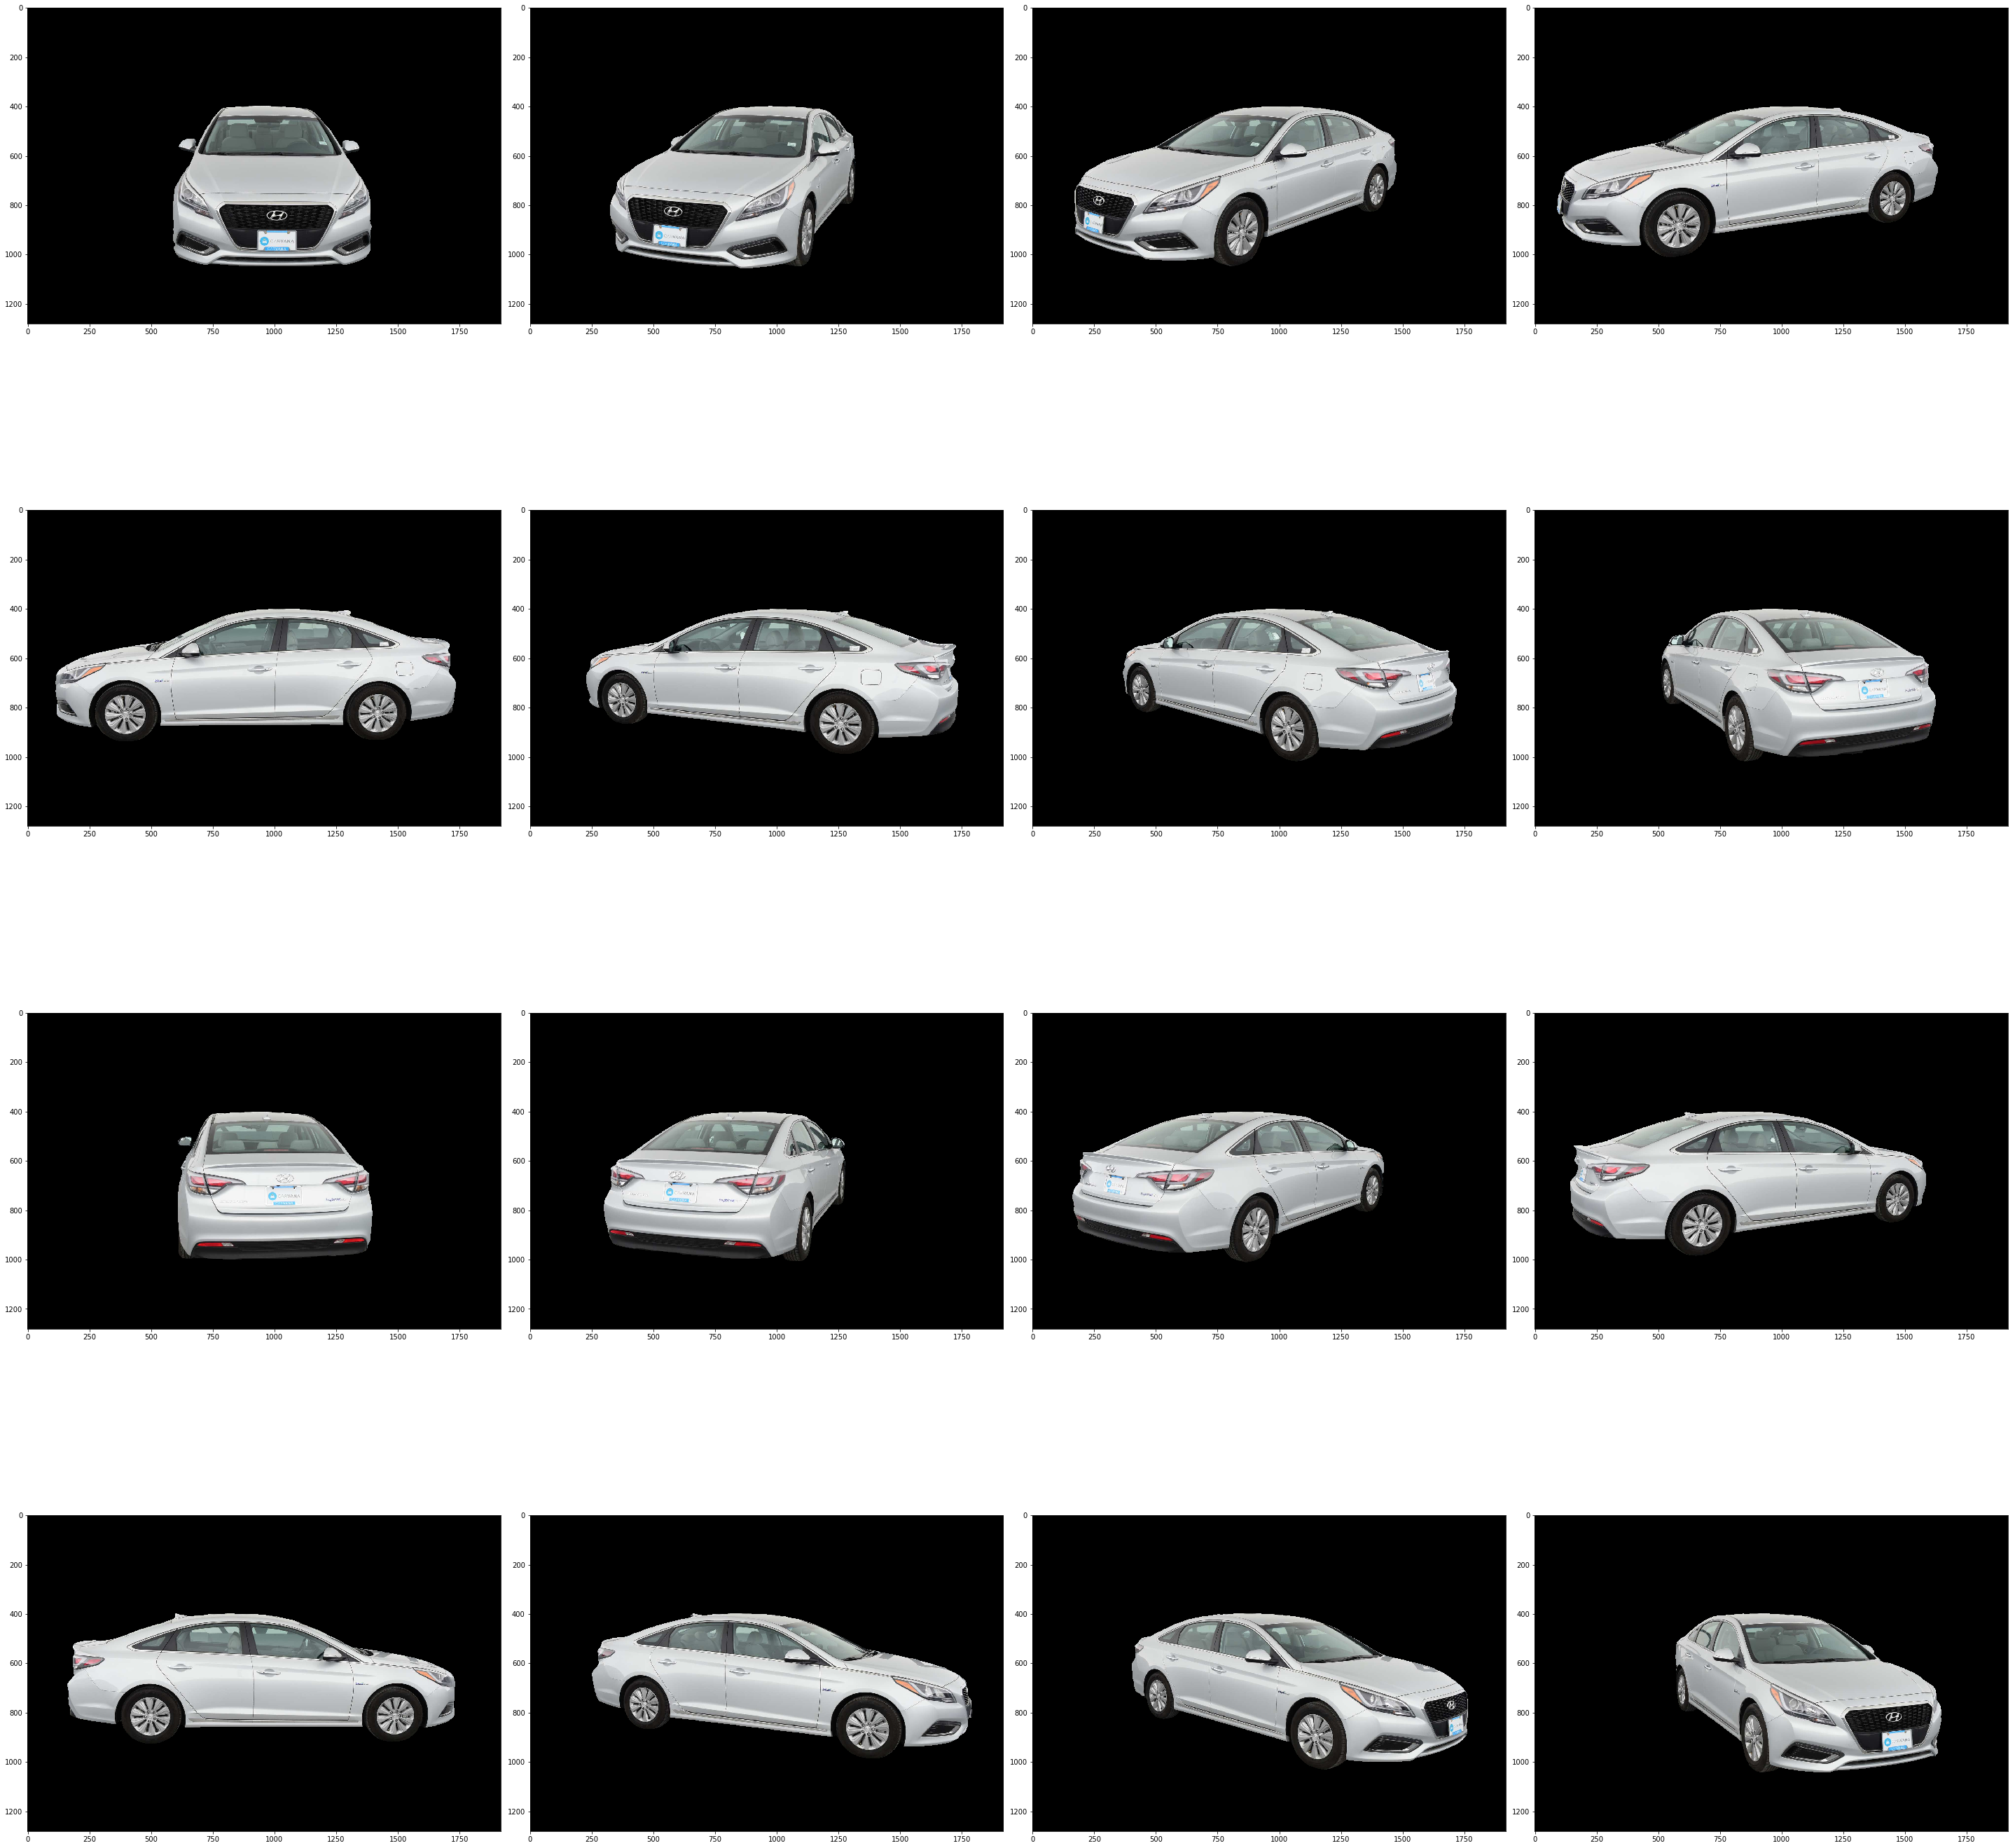

In [21]:
# 1024
fig, m_axs  = plt.subplots(4,4, figsize=(40,40))

fig.tight_layout()
m_axs = m_axs.flatten()
for i in range(len(pred_mask)):
    m_axs[i].imshow(cv2.bitwise_and(ori_img_Lst[i], ori_img_Lst[i], mask=pred_mask[i]))